<font size='10' color = 'E3A440'>**Pre-confèrence Workshop on Python**</font>
=======

<font color = 'E3A440'>*Pratical introduction to the analysis of unstructured data*</font>
=============

This tutorial is a short hands-on workshop to introduce the analysis of unstructured data for innovation studies. 

Structure of the workshop:
1. Presentation of sections 1 and 2 in a plenary mode (20 minutes)
2. Individual work on sections 2 and 3 (20 minutes)
3. Group work on section 3 (60 minutes)
4. Plenary section with the group presentation (20 minutes)

This tutorial cannot be considered exhaustive of the domain. 

### Auteurs: 
- Mikael Heroux-Vaillancourt <mikael.heroux-vaillancourt@polymtl.ca>
- Davide Pulizzotto <davide.pulizzotto@polymtl.ca>
- Pietro Cruciata <pietro.cruciata@polymtl.ca>
- Alvar Herrera <alvar.herrera@polymtl.ca> 

### Table des matières

- [Section 0. Introduction](#introduction)
- [Section 1. Preparation of data](#pre-processing)
- [Section 2. Descriptive statistics](#desc-stat)
- [Section 3. Analysis](#analysis)
- [Section 4. Conclusions](#concluding-remarks)

<a id='introduction'></a>
# <font size = '6' color='E3A440'>Section 0. Introduction</font>

This workshop is based on the research work of **Mikael Heroux-Vaillancourt** presented at the [P4IE Conference - Measuring Metrics that Matter](https://event.fourwaves.com/p4ie/pages), which will take place  on -10-11 May 2022 at the *Hilton Garden Inn*, in Ottawa.

Here the [link]() to get more information on the presentation.

In order to succeed in this workshop, a few concept have to be underlined:

1. This study is an exploratory analysis of several companies which obtained a [BCorp certification](https://www.bcorporation.net/en-us/)
2. The data analyzed come from a web scraping step of the snapshots found on [Wayback Machine](https://archive.org/web/) of all those companis of point 1.
3. Objectives are ... À COMPLETER QUAND MIKAEL NOUS DONNE UN RÉSUMÉ DE SA PRÉSENTATION


### Glossary of the workshop

Here, we list some terms that are used in this workshop:

1. <font color='E3A440'><b>Dataframe</b></font>: a data structure that organizes data into a 2-dimensional table of rows and columns
2. <font color='E3A440'><b>Metadata</b></font>: it is an information about an unstructured block of data (i.e., the author of a paper is a metadata of the text of that paper).
3. <font color='E3A440'><b>Token</b></font>: each sequence of character which constitue an indipendent linguistic unit, that is a word (i.e., each occurence of the verb eat is a different token).
4. <font color='E3A440'><b>Type</b></font>: The unique string of caracter which represent several occurrences of the same linguistic unit or word (i.e., the string 'eat' is the type for each token of the verb to eat).
5. <font color='E3A440'><b>POS tag</b></font>:  a process which aims to assign parts of speech to each word of a given text
6. <font color='E3A440'><b>Stopwords</b></font>: it refers to words that are very low semantic content such as article (the, an), modals (would, must), etc. 
7. <font color='E3A440'><b>Lemmatization</b></font>: a process that reduces the inflected words properly ensuring that the root word belongs to the language
8. <font color='E3A440'><b>Document-Term matrix</b></font>: it is a matrix where rows represent segment of text and columns are filled by linguistic features of that segment of text.
9. <font color='E3A440'><b>Weighting</b></font>: it is the weigth a mathematical function provides for each linguistic feature of each segment of text (i.e., Term frequency, Tf-Idf, BM25, etc.)
10. <font color='E3A440'><b>K-means clustering</b></font>: an unsupervised statistic method aiming to partition *n* observations into *k* clusters based on their proximity to the centroid


### Some basic concepts
The main step in text mining is to convert unstructured textual data into a mathematical model to be used in statistical learning. Thus, we need to create a <font color='E3A440'>**Document-Term matrix**</font>, a matrix $n \times w$, where $n$ is the number of text segments and $w$ is the number of textual features selected.The textual feature can have different nature. In the most simple model, these features correspond to the set of types that resume each token of the corpus. In other terms, $w$ is the number of features that characterize a segment of text The matrix is generally represented as follow:  
 
$$X = \begin{bmatrix} 
x_{11} & x_{12} & \ldots & x_{1w} \\
\vdots & \vdots       &  \ddots      & \vdots \\ 
x_{n1} & x_{12} & \ldots & x_{nw} \\
\end{bmatrix}
$$ 
 
\\
When we apply a <font color='E3A440'>**clustering algorithm**</font> to this matrix, we want to group rows in a homogeneous set of clusters. This means to minimize the intra-class inertia or the pairwise squared deviations of points in the same cluster:

$$ \underset{s}{\arg\min}\sum_{i=1}^{k}\frac{1}{\vert S_i\vert}\sum_\limits{x,y \in S_i}\Vert x-y \Vert^2$$

This kind of algorithms aim to create a vector $Y$ of size $n$, containing the <font color='E3A440'>**cluster label**</font> assigned to each segment of text from $1$ to $k$.

$$
Y = \begin{bmatrix} 
c_1 \\
c_2 \\
\vdots \\ 
c_n
\end{bmatrix}$$

Thus, $Y_1$ correspond to the cluster label given at $X_1$. Generally, $k$ is the main parameters of a clustering algorithm, which represent the number of cluster into which group text segments.

## 0.1 Preparation of Colab Virtual Machine

In order to work correctly on Colab, we need to prepare the environment by executing two main steps:
1. Download data from the GitHub project 
2. Install package to run code of this workshop

In [ ]:
# Downloading of data from the GitHub project
!rm -rf TEST_PRECONFERENCE/
!git clone https://github.com/puli83/TEST_PRECONFERENCE

In [ ]:
# Installation of packages
!pip install pickle5
!pip install nltk
!python -m spacy download en_core_web_sm

## 0.2 Import packages

We import the following packages that contain the functions needed to accomplish our task: 
- `re` une librairie pour les expressions régulières
- `matplotlib` pour tracer des graphiques
- `numpy` pour des fonctions d'algèbre linéaire
- `pandas` pour manipuler les données
- `sklearn` (scikit-learn) pour des modèles d'apprentissage automatique ainsi que des fonctions reliées à la pratique de l'apprentissage automatique
- `spacy` designed to build information extraction or natural language understanding systems. It supports several functions to performs several NLP task such us POS tag and NER
- `nltk` include over 50 corpora, access to lexical resources such as WordNet and function to perform text processing task as tokenization, tagging and parsing 

In [ ]:
import pandas as pd
import numpy as np
import scipy
import datetime
import time
import re
import os
import pickle5 as pickle
import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer #, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

## 0.3 Definition of custom functions
In the next chunk of code, we define the functions that we need to reach the goal of the workshop. These functions will not be explained in details since their comprehencion is not essenctial to accomplish the workshop.

In [ ]:
def prepare_data_for_WC(DTM, vocabulary_dtm):
    # compute total frequency for each word
    values_words = sum(DTM)
    #values_words = sum(tfidf_matrix)
    # verify type result and prepare data for wordcloud
    if type(values_words) is np.ndarray:
        values_words = [float(value) for value in np.nditer(values_words)]
    elif type(values_words) is scipy.sparse.csr.csr_matrix:
        values_words = [float(value) for value in np.nditer(values_words.todense())]
    else:
        print("Matrix in argument DTM has to be one of these two data classes:  'scipy.sparse.csr.csr_matrix' or 'numpy.ndarray'")
    ##
    list_mots = sorted(vocabulary_dtm.items(), key= lambda x:x[1])
    list_mots = [word for (word,idx) in  list_mots]
    words = zip(list_mots, values_words)
    words = sorted(words, key= lambda x:x[1], reverse=True)
    ## prepare data structure for wordcloud
    result_for_WC = {}
    #iterating over the tuples lists
    for (key, value) in words:
        result_for_WC[key] = value
    #
    return result_for_WC

def lexical_keyness(DTM, cls_kmeans, n_cluster = 0):
    import math
    # This code ref takes inspiration from this python module : https://pypi.org/project/corpus-toolkit/
    # and its main script:  https://github.com/kristopherkyle/corpus_toolkit/blob/master/corpus_toolkit/corpus_tools.py
    # which is based on this paper: https://aclanthology.org/J93-1003/

    cluster_keyness = n_cluster
    df_freq_target = pd.DataFrame(np.asarray(DTM[cls_kmeans.labels_ == cluster_keyness].sum(0).T).reshape(-1))#, columns = [word for (word,idx) in sorted(vectorized.vocabulary_.items(), key= lambda x:x[1])]))
    df_freq_target.index = [word for (word,idx) in sorted(vectorized.vocabulary_.items(), key= lambda x:x[1])]
    df_freq_target.index
    df_freq_target.columns = ['freq1']
    df_freq_target['freq2'] = np.asarray(DTM[~(cls_kmeans.labels_ == cluster_keyness)].sum(0).T).reshape(-1)
    #
    df_freq_target['tot'] = df_freq_target['freq1'] + df_freq_target['freq2']
    #
    df_freq_target['freq1'] = df_freq_target['freq1'].apply(lambda x: 0.0000001 if x == 0 else x).astype(float)
    df_freq_target['freq2'] = df_freq_target['freq2'].apply(lambda x: 0.0000001 if x == 0 else x).astype(float)
    #
    df_freq_target['freq1_norm'] = df_freq_target['freq1']/df_freq_target['freq1'].sum() * 1000000
    df_freq_target['freq2_norm'] = df_freq_target['freq2']/df_freq_target['freq2'].sum() * 1000000
    #
    df_freq_target['fraction'] = df_freq_target['freq1_norm'] / df_freq_target['freq2_norm']
    df_freq_target['Log-likelihood Ratio'] = df_freq_target['fraction'].apply(math.log2)
    return df_freq_target

def Clustering_kmeans(DTM, reduce_lsa = False, n_comp_lsa= 300, n_clusters = 2,  **kwargs):
    """
    Paramaters:
    DTM;  Matrice to pass under sklearn classifiers
    n_clusters = 2; the number of cluster to generate.
    reduce_lsa = False; If True, a SVD is executed on the DTM before to execute the clustering
    n_comp_lsa= 300; Number of component to keep after SVD on DTM.
    **kwargs; Arguments for Kmeans method of sklearn.cluster. For exemple :
    random_state = 1234,
    max_iter = 300,
    n_init = 20,
    tol = .000001,
    init = "k-means++",
    n_jobs = -1,
    precomputeDistances = True
    """
    import datetime
    from sklearn.cluster import KMeans
    from sklearn import metrics
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import Normalizer
    
    ## dimensionality reduction
    if reduce_lsa == True:
        from sklearn.decomposition import TruncatedSVD
        svd = TruncatedSVD(n_comp_lsa,
                           n_iter = 100,
                           random_state = kwargs['random_state'])
        #
        X_lsa = svd.fit_transform(DTM)
        explained_variance = svd.explained_variance_ratio_.sum()
        print("Explained variance of the SVD step: {}%".format(
            int(explained_variance * 100)))
        #
        DTM = X_lsa
    # Normalize samples individually to unit norm. Scaling inputs to unit norms is a common operation for text classification or clustering for instance.
    DTM = Normalizer().transform(DTM)
    cls_kmeans = KMeans(n_clusters = n_clusters,
                        random_state = kwargs['random_state'],
                        max_iter = kwargs['max_iter'],
                        n_init = kwargs['n_init'],
                        tol = kwargs['tol'],
                        init = kwargs['init'])
    
    cluster_labels = cls_kmeans.fit_predict(DTM)
    ## silhouette
    silhouette_avg = metrics.silhouette_score(DTM, cluster_labels)
    print("For n_clusters = %i;\t The silhouette_avg is : %f5" %(n_clusters, silhouette_avg))
    #
    cls_kmeans.DTM_ = DTM
    return cls_kmeans

def wordcloud_par_cluster(wordcloud, DTM, cls_kmeans, vocab, first_n_words=10, figsize=(18, 16), fontsize=32, plot_wordcloud = True, lst_clust = [], title_in_plot = "Clust_"):

        """
        wordcloud; A WordCloud function.
        DTM; A Docuemnt-Term Matrix
        vocab; It is a vocabulary from skllarn vectorizer
        first_n_words = 10; How many words to print
        figsize = (18, 16); Size of the plot. (this is the argument of this line plt.figure(figsize=figsize))
        fontsize = 32; Size of title font
        lst_clust = []; The list of cluster to plot. If empty, all the clusters are plotted
        title_in_plot = "Clust_"; title to put on top of plot \n
        """
        import numpy
        import scipy
        
        if not lst_clust:
            lst_clust = list(range(cls_kmeans.n_clusters))

        for x in lst_clust:
            DTM_temp = DTM[cls_kmeans.labels_ == x]
            result_for_WC= prepare_data_for_WC(DTM_temp, vocab)
            ###
            if plot_wordcloud == True:
                plot = wordcloud.generate_from_frequencies(result_for_WC)
                plt.figure(figsize=figsize)
                plt.imshow(plot)
                plt.title(title_in_plot + str(x) + '  N. of documents=' + str(DTM_temp.shape[0]),
                        fontsize = fontsize,
                        bbox=dict(facecolor='red', alpha=0.5))
                plt.axis('off')
                plt.show()
            print(f"Most frequent words for cluster {x} of size {str(DTM_temp.shape[0])} docs: ", list(result_for_WC)[0:first_n_words])

def plot_data_by_cluster(DTM, cls_kmeans):
    ## Reduction of dimension to 2 for visualisation reasons
    from sklearn.manifold import TSNE
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,metric='cosine', learning_rate=10, random_state = 794)
    reduc_dim_results = tsne.fit_transform(DTM)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    ## Create data structure for plotting
    df_reduction = pd.DataFrame()
    df_reduction['y'] =  cls_kmeans.labels_
    df_reduction['1-dim'] = reduc_dim_results[:,0]
    df_reduction['2-dim'] = reduc_dim_results[:,1]

    ## Generate the plot
    import seaborn as sns
    import colorcet as cc
    plt.figure(figsize=(16,10))
    sns.scatterplot(data = df_reduction,
                    x="1-dim",
                    y="2-dim",
                    hue="y",
                    palette = sns.color_palette(cc.glasbey, n_colors = cls_kmeans.n_clusters),)

    plt.show()

## 0.4 Import data



The following code sets the path from which to import data.

In [ ]:
ROOT_DIR='TEST_PRECONFERENCE/'
DATA_DIR=os.path.join(ROOT_DIR, 'Data')

---
We need to import the `.csv` file with the companies data. The data is imported in a tabular format (such as MS Excel) called **dataframe** and managed by `pandas`.

In [81]:
df_data = pd.read_csv(os.path.join(DATA_DIR, 'BCorp_companies_Web_Data.csv'))

---
The dataset has *1110* rows and *129* columns.

In [ ]:
df_data.shape

---
Further exploring some rows, we focus on two columns: 

+ **company_id** contains the domain of each BCorp companies under study
+ **text_web_page** contains a combination of all those pages founded in Wayback Machine for each company.

In [ ]:
df_data.head()

---
Below, we give a list of some important metadata to explore

In [ ]:
df_data[['website', 'company_name', 'date_certified', 'description', 'industry','sector',
       'country', 'state', 'city', 'assessment_year', 'overall_score']]


# <font size = '6' color='E3A440'>Section 1: Data pre-processing </font>
This section declines the main aspects of a classical preprocessing step of textual data. The main objective of this step is to organize unstructured data into a structure that can be digestible in a statistical learning process. In a few words, this process allows to transform the text into vectors and is divided into three main operations:
 1. Morphological Analysis
 2. Filter of lexical features
 3. Vectorisation of lexical features

## 1.1 Cleaning of metadata
One thing to be aware when working with  real world data is that they are always "dirty".

In this section, we provide a data cleaning step for our dataset. Since the state of Québec is written on two forms, one with accent and one without it, this issue generates two values for the same data.
Thus, we replace each "é"  with a simple "e".

In [83]:
df_data['state'] = df_data['state'].str.replace("é","e")

## 1.2 Morphological Analysis
An important operation during the preprocessing of unstructured textual data is to detect the **Morphological features** of words. This allows understanding of the roles that words have in their contexts. This operation is composed of two parts:
1. Part-of-Speech tagging, generally known as POS tagging
2. Lemmatisation, which consists in the reduction of a word to his lemma

These two sub-operations can be executed by different types of algorithms. We use a neural network pre-trained model using the module named `spacy`. In particular, we use the function `nlp.pipe()` to generate a list of preprocessed documents. This function has several arguments and it takes a list of string characters to be executed. Each element of this list is a textual segment or a document. 

In this first chunk of code, we load from `spacy` the pretrained model  called <font color="#CE9178">en_core_web_sm</font> ([More info](https://spacy.io/models/en)).   

In [88]:
nlp = spacy.load('en_core_web_sm')

---
In this second chunk, we apply the NLP pipeline to our textual data contained in the **text_combined** column, and this, by using the `nlp.pipe()` function. 

Thus, we generate the `preprocessed_docs` variable, namely a list containing preprocessed text of all the documents. We can observe the first document with `preprocessed_docs[0]`, the second with `preprocessed_docs[1]`, the third with `preprocessed_docs[2]`, etc.

Each element of the list `preprocessed_docs`, contains a list of word analyzed with `spacy`.


In [89]:
t0 = datetime.datetime.now() # line of code to register a timestamp 
df_data["text_preprocessed"] = list(nlp.pipe(df_data["text_web_page"], disable = ["tok2vec",'parser','ner']))
print(str(datetime.datetime.now() - t0)) # line of code to print the elapsed time from t0

0:00:17.082589


---
In the next chunk, we look at the first document in his **original format**

In [90]:
# Print first segment of the corpus
print(df_data.iloc[0]["text_web_page"])

Explore how you can make every B2B purchase count towards UN's Sustainable Development Goals (SDGs). 17 Ways connects SDG impact companies and multinationals for purpose-driven purchasing. Post a need and choose suppliers based on the products or services they offer and on the SDG areas you want to impact. You can also choose to search/sort by certifications. Appropriate companies will be alerted about your opportunity, but your information will be kept secure so you can decide how to engage and you won't be overwhelmed by potential suppliers. Now it's easy to be found by companies looking to purchase from businesses that are aligned with the SDG areas your company is working to impact. And 17 Ways helps you connect with other like-minded companies to create partnerships and do business together. The UN's Sustainable Development Goals (SDGs) outline 17 Ways companies can contribute to a sustainable planet and society. All the companies on 17 Ways choose which of the SDGs align with the

---
Below, we look at the **preprocessed version** of this first document. In particular, we print three attributes for each word of the first document:
1. `word.text`, which corresponds to the original version of the word, which is called **token**.
2. `word.pos_`, which corresponds to the POS tag predicted for that word.
3. `word.lemma_`, which corresponds to the lemma of the token.

For padagogical reasons, we only look at the first 10 words.


In [91]:
# Print morphosyntactial analysis of the first sentence of the corpus. Each element is separeted by a vertitcal line |
for idx, word in enumerate(df_data["text_preprocessed"].iloc[0]):
    print("Token: ", word.text, " | ", "POS tag: ", word.pos_," | ", "Lemma of the token: ", word.lemma_)
    # Break loop after first 10 words -> idx==10
    if idx == 10:
        break

Token:  Explore  |  POS tag:  VERB  |  Lemma of the token:  explore
Token:  how  |  POS tag:  ADV  |  Lemma of the token:  how
Token:  you  |  POS tag:  PRON  |  Lemma of the token:  -PRON-
Token:  can  |  POS tag:  VERB  |  Lemma of the token:  can
Token:  make  |  POS tag:  VERB  |  Lemma of the token:  make
Token:  every  |  POS tag:  DET  |  Lemma of the token:  every
Token:  B2B  |  POS tag:  NOUN  |  Lemma of the token:  b2b
Token:  purchase  |  POS tag:  NOUN  |  Lemma of the token:  purchase
Token:  count  |  POS tag:  NOUN  |  Lemma of the token:  count
Token:  towards  |  POS tag:  ADP  |  Lemma of the token:  towards
Token:  UN  |  POS tag:  PROPN  |  Lemma of the token:  UN


## 1.3 Filter of lexical features

In this section, we perform several pre-processing steps to transform the text to a format that can be understood and analyzed by our methods. 
1.   Eliminating stopwords : removing the low-level information from our text in order to give more focus to the important information
2.   Keeping only adverb, adjective, noun and verb


In the following chunck, we load the list of english **stopwords** from the package `nltk`. Since the list is customizable, we add the verb "would" that is not among the modale verbs included in this list. 

In [92]:
# download default list of stopword
nltk.download('stopwords')
# add custum words to the stopword list
stopwords_list = set(stopwords.words('english') + ['would'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


---
In the following chunk of code, we will use the previous the list of stopwords to filter words and the POS tag analysis to select only the words that are adverbs, adjectives, nouns and verbs to further highlight the part of speach meaningfull for our task.

In [93]:
for idx, row in df_data.iterrows():
    print(f"Sentence n. {idx}")
    print("Original :\t ",row['text_web_page'])
    print("Preprocessed:\t ", [w.lemma_.lower() for w in row['text_preprocessed'] if w.pos_ in ["ADV", "ADJ", "NOUN", "VERB"]  and w.text.lower() not in stopwords_list])
    if idx == 5:
        break

Sentence n. 0
Original :	  Explore how you can make every B2B purchase count towards UN's Sustainable Development Goals (SDGs). 17 Ways connects SDG impact companies and multinationals for purpose-driven purchasing. Post a need and choose suppliers based on the products or services they offer and on the SDG areas you want to impact. You can also choose to search/sort by certifications. Appropriate companies will be alerted about your opportunity, but your information will be kept secure so you can decide how to engage and you won't be overwhelmed by potential suppliers. Now it's easy to be found by companies looking to purchase from businesses that are aligned with the SDG areas your company is working to impact. And 17 Ways helps you connect with other like-minded companies to create partnerships and do business together. The UN's Sustainable Development Goals (SDGs) outline 17 Ways companies can contribute to a sustainable planet and society. All the companies on 17 Ways choose which

In [94]:
# initialize empty list
text_cleaned = []
spacy_lst_object = []
# iterate over each preprocessed document
for idx, row in df_data.iterrows(): 
    # keep only the lemma for each token which has been tagged as one of these POS tags ["ADV", "ADJ", "NOUN", "VERB"] AND its lemma IS NOT contained in the stopwords_list AND its lemma has more then 1 character
    text = [w.lemma_.lower() for w in row['text_preprocessed'] if w.pos_ in ["ADV", "ADJ", "NOUN", "VERB"] and w.lemma_.lower() not in stopwords_list and len(w.lemma_.lower())> 1]
    text_cleaned.append(text)
   
df_data["text_cleaned"] = text_cleaned
#df_data["text_spacy_prepross"] = spacy_lst_object


## 1.4 Vectorisation of lexical features

In the following section, we create the word matrix that will be used in our model transforming a collection of text documents into a matrix of token counts. The following code is used to set the parameters of the matrix that we will create.

In [99]:
def identity_tokenizer(text):
    return text

# Transforming the word in frequencies
vectorized = CountVectorizer(lowercase = False, # Convert all characters to lowercase before tokenizing
                             min_df = 5, # Ignore terms that have a document frequency strictly lower than the given threshold 
                             max_df = 450, # Ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)
                             stop_words = stopwords_list, # Remove the list of words provided
                             ngram_range = (1, 1), # Get the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted
                             tokenizer=identity_tokenizer) # Override the string tokenization step while preserving the preprocessing and n-grams generation steps

---
The following chunk of code we use the `nltk` learn a vocabulary of all tokens in the raw documents.

In [100]:
freq_term_DTM = vectorized.fit_transform(df_data["text_cleaned"])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  % sorted(inconsistent)


In [101]:
freq_term_DTM

<1110x2987 sparse matrix of type '<class 'numpy.int64'>'
	with 91115 stored elements in Compressed Sparse Row format>

---
In the next chunk of code, we create another matrix using 'scikitilearn' but this time we use the TFIDF as weighting scheme of each word. The TFIDF is calculated as follow:

$
\begin{align}
&\text{Let}\ t = \text{Term}\\
&\text{Let}\ IDF = \text{Inverse Document Frequency}\\
&    \text{Let}\ TF =\text{Term Frequency}\\[2em]
&    TF \: =\: \frac{\text{term frequency in document}}{\text{total words in document}}\\[1em]
&    IDF(t) \: =\: \log_2\left(\frac{\text{total documents in corpus}}{\text{documents with term}}\right)
\end{align}
$

Then tf–idf is calculated as :
$$tfidf( t, d, D ) = tf( t, d ) \times idf( t, D )$$

In [102]:
# This execute the tfidf weigthing
tfidf = TfidfTransformer(norm='l1')
tfidf_DTM = tfidf.fit_transform(freq_term_DTM)

<a id="desc-stat"></a>
# <font size = '6' color='f28c00'>Section 2: Descriptive statistics</font>
In this section, we explore the cleaned text of the web pages through descriptive analysis.



## 2.1 Metadata
In this section, we extract some statistics about the Metadata

In [103]:
#We count the number of companies that we have grouping by the sector
df_data['sector'].value_counts()

Service with Minor Environmental Footprint          606
Wholesale/Retail                                    222
Manufacturing                                       148
Service with Significant Environmental Footprint     99
Agriculture/Growers                                  30
Service                                               5
Name: sector, dtype: int64

In [104]:
#We count the number of companies that we have grouping by the industry
df_data['industry'].value_counts()

Food & Beverage                        148
IT Software & Services/Web Design       91
Marketing & Communications Services     85
Other                                   71
Home & Personal Care                    66
                                      ... 
Other Business Products                  1
Other Energy Generation                  1
Consumer Rewards                         1
Catering & Meeting/Event Management      1
Energy Efficiency & Consulting           1
Name: industry, Length: 65, dtype: int64

In [105]:
#We count the number of companies that we have grouping by the sector and the industry
df_data.groupby(['sector','industry']).count()

website  company_id  \
sector              industry                                                    
Agriculture/Growers Agricultural Services                       5           5   
                    Food & Beverage                             9           9   
                    Growers                                    12          12   
                    Home & Personal Care                        1           1   
                    Other                                       3           3   
...                                                           ...         ...   
Wholesale/Retail    Pet Products                                2           2   
                    Pharmaceuticals & Supplies                  2           2   
                    Sports Equipment, Toys & Accessories        7           7   
                    Storefront                                 11          11   
                    Sustainability Consulting                   1           1   

                                                          company_name  \
sector              industry                                             
Agriculture/Growers Agricultural Services                            5   
                    Food & Beverage                                  9   
                    Growers                                         12   
                    Home & Personal Care                             1   
                    Other                                            3   
...                                                                ...   
Wholesale/Retail    Pet Products                                     2   
                    Pharmaceuticals & Supplies                       2   
                    Sports Equipment, Toys & Accessories             7   
                    Storefront                                      11   
                    Sustainability Consulting                        1   

                                                          date_first_certified  \
sector              industry                                                     
Agriculture/Growers Agricultural Services                                    5   
                    Food & Beverage                                          9   
                    Growers                                                 12   
                    Home & Personal Care                                     1   
                    Other                                                    3   
...                                                                        ...   
Wholesale/Retail    Pet Products                                             2   
                    Pharmaceuticals & Supplies                               2   
                    Sports Equipment, Toys & Accessories                     7   
                    Storefront                                              11   
                    Sustainability Consulting                                1   

                                                          date_certified  \
sector              industry                                               
Agriculture/Growers Agricultural Services                              5   
                    Food & Beverage                                    9   
                    Growers                                           12   
                    Home & Personal Care                               1   
                    Other                                              3   
...                                                                  ...   
Wholesale/Retail    Pet Products                                       2   
                    Pharmaceuticals & Supplies                         2   
                    Sports Equipment, Toys & Accessories               7   
                    Storefront                                        11   
                    Sustainability Consulting                 

In [106]:
#We count the number of companies that we have grouping by the state and the city
df_data.groupby(['state','city']).count()

website  company_id  company_name  date_first_certified  \
state     city                                                                  
Alabama   Huntsville        1           1             1                     1   
          Mobile            1           1             1                     1   
Alaska    Anchorage         1           1             1                     1   
Alberta   Calgary          13          13            13                    13   
          Edmonton          5           5             5                     5   
...                       ...         ...           ...                   ...   
Wisconsin Milwaukee         3           3             3                     3   
          Nashotah          1           1             1                     1   
          Oneida            1           1             1                     1   
Wyoming   Wilson            1           1             1                     1   
Yukon     Whitehorse        1           1             1                     1   

                      date_certified  current_status  description  industry  \
state     city                                                                
Alabama   Huntsville               1               1            1         1   
          Mobile                   1               1            1         1   
Alaska    Anchorage                1               1            1         1   
Alberta   Calgary                 13              13           13        13   
          Edmonton                 5               5            5         5   
...                              ...             ...          ...       ...   
Wisconsin Milwaukee                3               3            3         3   
          Nashotah                 1               1            1         1   
          Oneida                   1               1            1         1   
Wyoming   Wilson                   1               1            1         1   
Yukon     Whitehorse               1               1            1         1   

                      industry_category  products_and_services  ...  \
state     city                                                  ...   
Alabama   Huntsville                  1                      1  ...   
          Mobile                      1                      1  ...   
Alaska    Anchorage                   1                      1  ...   
Alberta   Calgary                    13                     13  ...   
          Edmonton                    5                      5  ...   
...                                 ...                    ...  ...   
Wisconsin Milwaukee                   3                      2  ...   
          Nashotah                    1                      1  ...   
          Oneida                      1                      1  ...   
Wyoming   Wilson                      1                      1  ...   
Yukon     Whitehorse                  1                      1  ...   

                      ia_workers_it_training_education  \
state     city                                           
Alabama   Huntsville                                 1   
          Mobile                                     1   
Alaska    Anchorage                                  1   
Alberta   Calgary                                    6   
          Edmonton                                   3   
...                                                ...   
Wisconsin Milwaukee                                  1   
          Nashotah                                   0   
          Oneida                                     0   
Wyoming   Wilson                                     0   
Yukon     Whitehorse                                 0   

                      ia_workers_it_worker_benefits  \
state     city                                        
Alabama   Huntsville                              0   
          Mobile                                  0   
Alaska    Anchorage                      

In [107]:
#We count the number of companies that we have in Canada grouping by the state and the city
df_data[df_data.country=='Canada'].groupby(['state','city']).count()

website  company_id  company_name  \
state            city                                               
Alberta          Calgary             13          13            13   
                 Edmonton             5           5             5   
British Columbia Burnaby              2           2             2   
                 Coquitlam            1           1             1   
                 Duncan               1           1             1   
...                                 ...         ...           ...   
Quebec           Quebec (QC)          1           1             1   
                 Saint Laurent        1           1             1   
                 Sherbrooke           1           1             1   
Saskatchewan     Saskatoon            1           1             1   
Yukon            Whitehorse           1           1             1   

                                date_first_certified  date_certified  \
state            city                                                  
Alberta          Calgary                          13              13   
                 Edmonton                          5               5   
British Columbia Burnaby                           2               2   
                 Coquitlam                         1               1   
                 Duncan                            1               1   
...                                              ...             ...   
Quebec           Quebec (QC)                       1               1   
                 Saint Laurent                     1               1   
                 Sherbrooke                        1               1   
Saskatchewan     Saskatoon                         1               1   
Yukon            Whitehorse                        1               1   

                                current_status  description  industry  \
state            city                                                   
Alberta          Calgary                    13           13        13   
                 Edmonton                    5            5         5   
British Columbia Burnaby                     2            2         2   
                 Coquitlam                   1            1         1   
                 Duncan                      1            1         1   
...                                        ...          ...       ...   
Quebec           Quebec (QC)                 1            1         1   
                 Saint Laurent               1            1         1   
                 Sherbrooke                  1            1         1   
Saskatchewan     Saskatoon                   1            1         1   
Yukon            Whitehorse                  1            1         1   

                                industry_category  products_and_services  ...  \
state            city                                                     ...   
Alberta          Calgary                       13                     13  ...   
                 Edmonton                       5                      5  ...   
British Columbia Burnaby                        2                      2  ...   
                 Coquitlam                      1                      1  ...   
                 Duncan                         1                      1  ...   
...                                           ...                    ...  ...   
Quebec           Quebec (QC)                    1                      1  ...   
                 Saint Laurent                  1                      1  ...   
                 Sherbrooke                     1                      1  ...   
Saskatchewan     Saskatoon                      1                      1  ...   
Yukon            Whitehorse                     1                      1  ...   

                                ia_workers_it_training_education  \
state            city                                              
Alberta          Calgary                                 

---
In the following chunk of code, we do some descriptive analysis of the metadata "overall_score" that is a score assign to each company by the BCorp organization. The highest is the score the more virtous is the company

We get the mean of the `overall_scoe` grouping by the sector.


In [108]:
# .groupby() execute the groping step ans .mean() is the function to average 
df_data.groupby(['sector'])['overall_score'].mean()

sector
Agriculture/Growers                                 96.863333
Manufacturing                                       94.621622
Service                                             88.900000
Service with Minor Environmental Footprint          97.692409
Service with Significant Environmental Footprint    94.574747
Wholesale/Retail                                    92.618468
Name: overall_score, dtype: float64

---
We calculate the average of the overall score of companies that we have in Canada grouping by the state

In [109]:
# df_data[df_data['country'] == 'Canada'] this part of code allow ti select rows which have values 'Canada' in column 'country'
df_data[df_data['country'] == 'Canada'].groupby(['state'])['overall_score'].mean()

state
Alberta                      100.094444
British Columbia              98.853333
Manitoba                      93.600000
New Brunswick                 92.083333
Newfoundland and Labrador    105.800000
Nova Scotia                   97.280000
Ontario                      100.915190
Quebec                        89.768182
Saskatchewan                  85.000000
Yukon                        103.900000
Name: overall_score, dtype: float64

---
We extract the basic statistics of the overall score of the companies/webpages that we have in the sector Service with Significant Environmental Footprint

In [110]:
# .describe() dive basic statistics os a numerical variable
df_data[df_data['sector'] == 'Service with Significant Environmental Footprint']['overall_score'].describe()

count     99.000000
mean      94.574747
std       15.262448
min       80.000000
25%       84.050000
50%       89.700000
75%      100.100000
max      140.200000
Name: overall_score, dtype: float64

---
We extract the basic statistics of the overall score of the companies/webpages that we have in the sector Service with Minor Environmental Footprint

In [111]:
# .describe() dive basic statistics os a numerical variable
df_data[df_data['sector'] == 'Service with Minor Environmental Footprint']['overall_score'].describe()

count    606.000000
mean      97.692409
std       16.846435
min       80.000000
25%       83.925000
50%       92.500000
75%      107.000000
max      162.700000
Name: overall_score, dtype: float64

---
Compare two values of a variable. i.e. tow different industry of the columns `industry`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


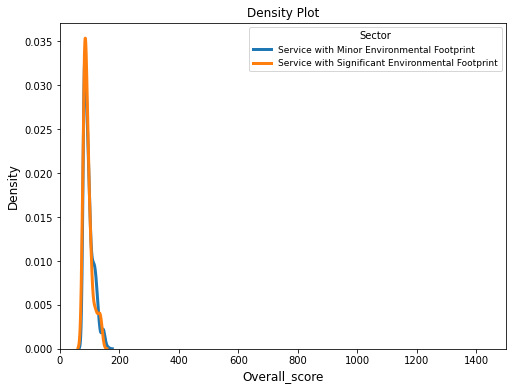

In [112]:
#Selecting the industry sector to examinate
lst_env_sector=["Service with Minor Environmental Footprint", "Service with Significant Environmental Footprint"]
######Setting the parameters of the graph to plot
for sector in lst_env_sector:
  # Create a subset with the two sectors
  subset = df_data[df_data.sector == sector]
  sns.distplot(subset['overall_score'], hist=False, kde=True, kde_kws={'linewidth': 3}, label=sector)
##Plotting the graph of the two industry sector under exam
plt.legend(prop={'size': 9}, title='Sector')
plt.title('Density Plot')
plt.xlabel('Overall_score', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
plt.gcf().set_size_inches(8, 6)
plt.show()

## 2.1 Textual data

In this section, we extract the word frequency from the webpages cleaned and we illustrate them through the wordcloud



---
In the next chunk of code, we need to execute some intermediate operations to prepare data. Essentially, we compute total frequencies of words using the simple frequency weighting, which is stored in the `freq_term_DTM` matrix. 

In [113]:
# get vocabulary
vocab = vectorized.vocabulary_
# compute frequency of word using freq_term_DTM
data_WC = prepare_data_for_WC(freq_term_DTM, vocab)

---
Then, we generate the plot.

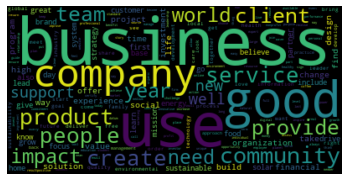

In [114]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(data_WC)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

---
Below, we show the wordcloud considering a specific industry.

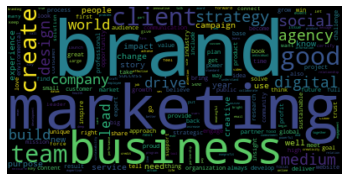

In [115]:
vocab = vectorized.vocabulary_
# select some rows according to the index of the rows
selected_index = df_data[df_data['industry'] == 'Marketing & Communications Services'].index
selected_DTM = freq_term_DTM[selected_index]
####
data_WC = prepare_data_for_WC(selected_DTM, vocab)
wordcloud = WordCloud().generate_from_frequencies(data_WC)
plt.imshow(wordcloud, interpolation='bilinear')
plt.figsize=(12, 10)
plt.axis("off")
plt.show()

---
And then by sector

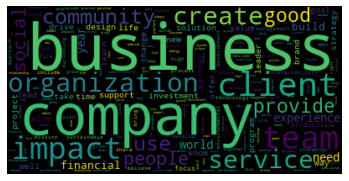

In [116]:
vocab = vectorized.vocabulary_
# select some rows according to the index of the rows
selected_index = df_data[df_data['sector'] == "Service with Minor Environmental Footprint"].index #################################
selected_DTM = freq_term_DTM[selected_index]
####
data_WC = prepare_data_for_WC(selected_DTM, vocab)
wordcloud = WordCloud().generate_from_frequencies(data_WC)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

---
The following chunks of codes create a descriptive graph of the number of words on web pages according to the different categories examinded.Here we analyse all the `sectort` variable.

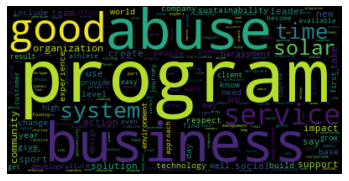

In [117]:
vocab = vectorized.vocabulary_
# select some rows according to the index of the rows
selected_index = df_data[df_data['state'] == 'Alberta'].index
selected_DTM = freq_term_DTM[selected_index]
####
data_WC = prepare_data_for_WC(selected_DTM, vocab)
wordcloud = WordCloud().generate_from_frequencies(data_WC)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

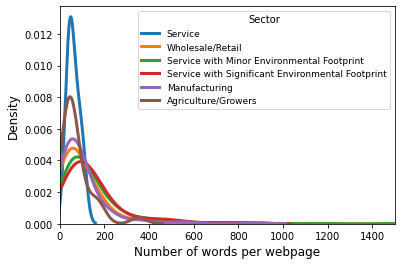

In [118]:
# Creating a new column 'number_words_webpages' with the number of words for each article generated with the "apply" function apply the len to all the column   
df_data['number_words_webpages'] = df_data["text_cleaned"].apply(len)
# Setting the parameters of the graph that we will plot below
for sector in df_data.sector.unique():
  # Create a subset with the different sectors
  subset = df_data[df_data.sector == sector]
  sns.distplot(subset['number_words_webpages'],
               hist=False,# Boolean value to plot a (normed) histogram.
               kde=True, # Boolean value to plot a gaussian kernel density estimate
               kde_kws={'linewidth': 3},
               label=sector)
# Plot the graph with the distribution of the number of words for each webpages in the different sectors
plt.legend(prop={'size': 9}, title='Sector')
# plt.title('Density Plot for Each Author')
plt.figsize=(12, 10)
plt.xlabel('Number of words per webpage', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
#plt.gcf().set_size_inches(8, 6)
plt.show()

---
Here, we execute the same operation, but subsetting only those companies which are in two specific sector: "Service with Minor Environmental Footprint" and "Service with Significant Environmental Footprint"


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


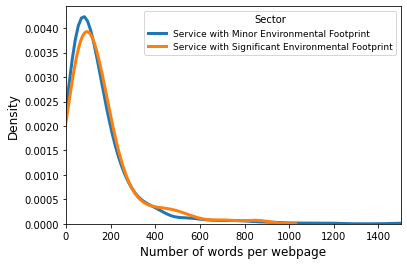

In [119]:
#Selecting the industry sector to examinate
lst_env_sector=["Service with Minor Environmental Footprint", "Service with Significant Environmental Footprint"]
######Setting the parameters of the graph to plot
for sector in lst_env_sector:
  # Create a subset with the two sectors
  subset = df_data[df_data.sector == sector]
  sns.distplot(subset['number_words_webpages'], 
               hist=False, 
               kde=True, 
               kde_kws={'linewidth': 3}, 
               label=sector)
##Plotting the graph of the two industry sector under exam
plt.legend(prop={'size': 9}, title='Sector')
# plt.title('Density Plot for Each Author')
plt.xlabel('Number of words per webpage', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
plt.figsize=(12, 10)
plt.show()

Here, we execute  the same operation but considering the country and a specific sector

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


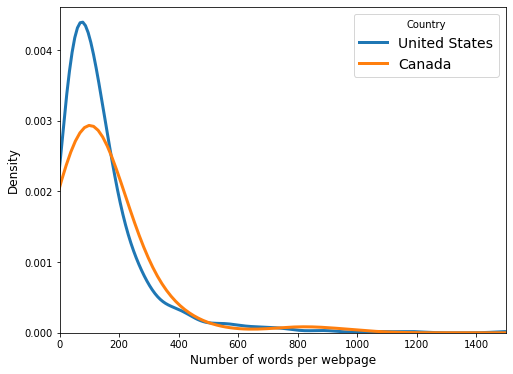

In [120]:
#Selecting the sector to represent in the plot
data_MEF=df_data[df_data['sector']=="Service with Minor Environmental Footprint"]

for country in data_MEF.country.unique():
  # Create a subset with the different country
  subset = data_MEF[data_MEF.country == country]
  sns.distplot(subset['number_words_webpages'], 
               hist=False, 
               kde=True, 
               kde_kws={'linewidth': 3}, 
               label=country)
#Plot the graph highlighting the differences between the countries of the selected sector
plt.legend(prop={'size': 14}, title='Country')
# plt.title('Density Plot for Each Author')
plt.xlabel('Number of words per webpage', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
plt.gcf().set_size_inches(8, 6)
plt.show()

---
We show a wordcloud looking at only one values in a columns, i.e. one state (Aberta) of columns `state`.

<a id="analysis"></a>
# Section 3: Analysis 

In this section, we run the k mean cluster algorithm on the dataset

## 3.1 Document clustering


As meantioned in section 1, the goal of the k-means cluster is to group rows in a homogeneous set of clusters minimizing the pairwise squared deviations of the data points in the same cluster. Below, an example of a k-mean clusters with k = 5

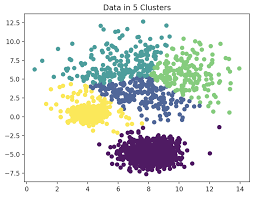

(https://www.ml-science.com/k-means-clustering)


In the chuck below, we execute the clustering algorithm on the TF-IDF matrix (`tfidf_DTM`), chosing to generate `20` clusters.

In [121]:
cls_kmeans = Clustering_kmeans(DTM = tfidf_DTM, # Matrice to pass under sklearn classifiers
                               reduce_lsa = True,# a SVD is executed on the DTM before to execute the clustering
                               n_comp_lsa= 300,# Number of component to keep after SVD on DTM.
                               n_clusters = 20,# Number of cluster represented in the plot
                               random_state = 8426, # Determines random number generation for centroid initialization
                               max_iter = 1000, #Maximum number of iterations of the k-means algorithm for a single run
                               n_init = 100,# Number of time the k-means algorithm will be run with different centroid seeds
                               tol = 0.0001,# Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence
                               init = "k-means++")# selects initial cluster centers for k-mean clustering in a smart way to speed up convergence

Explained variance of the SVD step: 74%
For n_clusters = 20;	 The silhouette_avg is : 0.0303365


Count the number of documents for each cluster.

In [122]:
# Count the Number of Occurrences in a Python list using Counter
from collections import Counter
Counter(cls_kmeans.labels_)

Counter({0: 66,
         1: 49,
         2: 98,
         3: 40,
         4: 66,
         5: 27,
         6: 68,
         7: 30,
         8: 24,
         9: 63,
         10: 19,
         11: 19,
         12: 67,
         13: 27,
         14: 23,
         15: 42,
         16: 38,
         17: 239,
         18: 34,
         19: 71})

## 3.2 Plot data grouped by clusters

In this subsection, we plot the result of the cluster in a 2D representation

In [ ]:
plot_data_by_cluster(DTM = tfidf_DTM, cls_kmeans = cls_kmeans)

## 3.3 Wordcloud by cluster

We use Tf-IDF weights to plot most important words for each cluster.

In [ ]:
wordcloud_par_cluster(wordcloud = WordCloud(), # A WordCloud function. 
                      DTM = tfidf_DTM,# A Document-Term Matrix 
                      cls_kmeans = cls_kmeans, 
                      vocab = vectorized.vocabulary_, # a vocabulary from scikitlearn vectorizer
                      first_n_words=10,#  It indicates how many words to print
                      figsize=(12, 10),
                      fontsize=32,
                      plot_wordcloud = False,
                      lst_clust = [],
                      title_in_plot = "Clust_")

## 3.4 Statistics for Lexical Keyness


A complemtary analysis of the sum of Tf-IDF weigths is <font color='f28c00'>keyness</font>.  This analysis gives the statistical significance of a keyword's frequency in a given corpus, relative to a reference corpus.

In our case, we compare all the words of the documents of a cluster against the other docuemnts of the corpus. The Log-likelihood Ratio return the lexical specificity of the word for the target cluster. 

Keyness is generally sensible to low frequency. For this reason we can also sort Log-likelihood Ratio after having removed low frequent words.

A short description of the method is accesible [here](https://alvinntnu.github.io/NTNU_ENC2036_LECTURES/keyword-analysis.html#statistics-for-keyness).

---
Keyness is generally sensible to low frequency. 

In [ ]:
df_keyness = lexical_keyness(freq_term_DTM, cls_kmeans, 13)+
df_keyness[df_keyness['tot']>50]['Log-likelihood Ratio'].sort_values(ascending=False)

## 3.5 Cross-Analysis of the cluster results with the metadata

We can use metadata to deeper explore clusters created by the Kmeans. 

In this subsection, we analyze the `overall_score` and the `sector` of the companies for each cluster. 

in the chunk below, we preapare data for analysis.

In [123]:
#Create a new column to assign to each company the correspondant cluster
df_data['cluster_labels'] = cls_kmeans.labels_

---
The following chunk of code calculate the mean of the overall score of a specific cluster of document

In [124]:
df_data.loc[cls_kmeans.labels_== 10, 'overall_score'].mean()

99.26842105263158

---
The chunk of code below creates a box plot based on the overall score for each cluster

In [ ]:
df_data.boxplot('overall_score', by='cluster_labels', figsize=(12, 8))

---
In the next chunk of code, for comparing reasons, we create a box plot for each sector based on the overall score

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


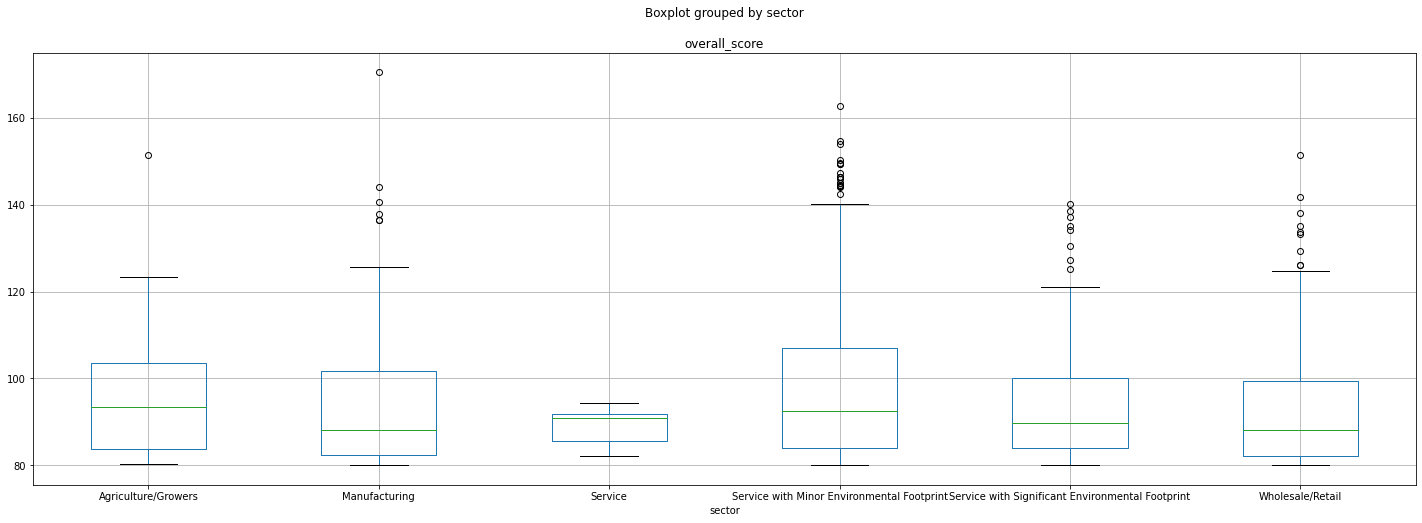

In [ ]:
df_data.boxplot('overall_score', by='sector', figsize=(24, 8))

---
Then, we calculate the mean of the overall score for each cluster

In [ ]:
mean_score_cluster = df_data[['cluster_labels','overall_score']].groupby('cluster_labels').mean()#['overall_score'].sort_values()

In [ ]:
from numpy import median 
######Setting the parameters of the graph to plot
sns.barplot(data = mean_score_cluster, x=mean_score_cluster.index, y=mean_score_cluster["overall_score"], estimator=median)
##Plotting the graph of the two industry sector under exam
plt.legend(prop={'size': 9}, title='Cluster')
# plt.title('Density Plot for Each Author')
plt.xlabel('Clusters', size=12)
plt.ylabel('Overall_score', size=12)
plt.figure(figsize=(12, 10))
plt.show()

---
Here, we extract the median of the overall score for each cluster

In [ ]:
df_data[['cluster_labels','overall_score']].groupby('cluster_labels').median()#['overall_score'].sort_values()

---
Below, we generate a cropss table of `sector` and `cluster_labels`. We use the compute ration insertad of simple frequency. Thus, we get the propotion of sector for each cluster.

In [ ]:
nominal_metadata_to_analyse = 'sector'
df_test = pd.DataFrame(columns=set(df_data[nominal_metadata_to_analyse])) 
for c_t_ in range(cls_kmeans.n_clusters):
    df_test.loc[c_t_] = df_data.loc[cls_kmeans.labels_== c_t_, nominal_metadata_to_analyse].value_counts()
df_test = df_test.fillna(0)
#
# Ratio
for col in df_test.columns:
    df_test[col] = df_test[col] / df_test[col].sum() * 100

df_test = df_test.round(2)
df_test

## 3.6 Retrive most representatives documents by cluster

In this subsection, we retrieve the most representative documents for each cluster.

In the chunk below we prepare data and any output will be printed.

In [125]:
from sklearn.metrics.pairwise import cosine_similarity
df_data['Cosine_of_related_cluster'] = 0
for idx, centroid in enumerate(cls_kmeans.cluster_centers_):
    idx_cluster = cls_kmeans.labels_ == idx
    similarity = cosine_similarity(cls_kmeans.DTM_[idx_cluster], centroid.reshape(1, -1)).flatten()
    df_data.loc[idx_cluster, 'Cosine_of_related_cluster'] = similarity 

---
Below, we print docuements for a specific cluster 

In [ ]:
## chose cluster number to analyse
n_clust = 5
df_data[df_data["cluster_labels"] == n_clust].sort_values(by='Cosine_of_related_cluster', ascending= False)[['Cosine_of_related_cluster',"text_web_page"]]

LE CODE EN DESSOUS EST ENCORE SOUS ÉVALUATION

In [128]:
words = ["solar", "energy", "installation"]
testo=df_data[df_data["cluster_labels"] == 5].sort_values(by='Cosine_of_related_cluster', ascending= False)["text_web_page"].iloc[0]
print(testo)

Notice: Due to COVID-19, we'll be taking extra precautions to keep you, our employees, and the community healthy and safe during these challenging times. We remain open and ready to serve our community and your energy needs. Please don't hesitate to contact us if you have any questions. Let us show you why our customers have given us 100% customer satisfaction on Solar Reviews, Google, and Yelp over 3,500 solar panel installations completed throughout New Mexico. We're proving there is a better way to do business – using business as a force for positive change. When you choose Positive Energy Solar, you get more than solar panels for your home or business. You're amplifying your positive impact by doing business with a company that's working to create positive change in New Mexico. You'll recognize our employee-owners provide superior quality work and service because they have a personal stake in your satisfaction, and as a local New Mexico solar company, we know the climate, sun, and 

In [176]:
#re.findall("({0, 200}.)("+")|(".join(words) + ")(.{0, 200})", testo)
#re.match("({0, 200}.)"+"(solar)"+"(.{0, 200})", testo)
re.findall("(.{200})(" + "|".join(words)+ ")(.{200})", testo)

[(" to COVID-19, we'll be taking extra precautions to keep you, our employees, and the community healthy and safe during these challenging times. We remain open and ready to serve our community and your ",
  'energy',
  " needs. Please don't hesitate to contact us if you have any questions. Let us show you why our customers have given us 100% customer satisfaction on Solar Reviews, Google, and Yelp over 3,500 solar pa"),
 ("allations completed throughout New Mexico. We're proving there is a better way to do business – using business as a force for positive change. When you choose Positive Energy Solar, you get more than ",
  'solar',
  " panels for your home or business. You're amplifying your positive impact by doing business with a company that's working to create positive change in New Mexico. You'll recognize our employee-owners "),
 ("ng business with a socially & environmentally responsible company that's a force for good in New Mexico. Since 1997, our focus has been on being you

In [167]:
"(.{200})" + "(solar|energy|installation)" + "(.{200})"

'(.{200})(solar|energy|installation)(.{200})'

In [175]:
"(.{200})(" + "|".join(words)+ ")(.{200})"

'(.{200})(solar|energy|installation)(.{200})'

In [ ]:
"("+")|(".join(words) + ")"

In [126]:
".{5}(?:one|two).{5}"

'.{5}(?:one|two).{5}'

In [ ]:
df_data.iloc[closeness_scores]['Cosine_of_related_cluster']

In [ ]:
for x in close_idx_similarity_tpl:
    print(list(x))
    break

In [ ]:
df_data.iloc[136]['text_web_page']
# df_data.iloc[136]['description']
# df_data.columns

# Section 4: Exercice

In this section paticipants challenge themself reproducing the steps made in section 1, 2 and 3. The exercise is accomplished by groups. Each group **will present the final result of their work** in no more then 5 minutes at the end of the workshop. Below, we describe the steps of the exercice.

In the first phase (10 minutes maximum), each group has to chose a sub-corpus of the whole corpus using metadata, such as `sector`, `industry`, `country`, `state` or `city`. They can chose a combination of them, for exemple, a sub-corpus containing companies of the agriculture sector of Canada. For analysis of textual data, groups can choose between two different textual data field : 
1. `text_web_page`, which contains data collected by WaybackMachine and used for the first part of this workshop 
2. `description`, which contain a short description of companies, provided by them to BCorporation organization.

In the second phase (40 minutes), groups will pass trougth all the analytical steps, from section 4.2 to section 4.8. In those sections, we provide you all the necessary chunks of code in order to succeed the exercise. In the most of these chunk of code, you only need to fill some empty part, which are indicated with the three points `...`. Occasionally, you could modify other part of the code (for intermediate level participants only).

In the third phase (10 minutes), groups has to complete the interpretation of the results and prepare one or two points they chose to show to the class. 

Belolw, we show the two textual field you can choose for the exercice.

In [ ]:
df_data["description", "text_web_page"]

## 4.1 Select your sub-corpus

Look at metadata and, after discussion with your group, select the sub-corpus you want to explore. Be sure to have enough companies in your sub-corpus (around 100 at least). 

Don't be afraid to ask help to your monitor for this part!!

The folowing chunk give you an exemple of subsection. PAy attention the folowng subsection do not contain encoug document.

Below, we provide an example of subsection of rows, regarding to sector. We assign the result of the subsection to a new dataset named `df_data_selection`.

In [ ]:
df_data_selection = df_data[df_data["sector"]=='service']

## 4.2 Morphological Analysis
For the morphological analysis you can choose between two textual data field: `text_web_page`,`description`. Fill the empty part `...` with the chosen textual column of the subset created above

In [ ]:
df_data_selection['text_preprocessed'] = list(nlp.pipe(df_data_selection[...], disable = ["tok2vec",'parser','ner']))

## 4.3 Filter lexical feature
You can add words of your choice to the stopword list. This is not necessary to succeed the exercice, but can help if you want to remove non significant word which appear later in your analysis.

In [ ]:
# download default list of stopword
nltk.download('stopwords')
# add custum words to the stopword list
stopwords_list = set(stopwords.words('english') + ['would'])

---
Fill the empty part `...` with the list of POS tag you want to include in your feature selection

In [ ]:
# initialize empty list
text_cleaned = []
spacy_lst_object = []
# iterate over each preprocessed document
for idx, row in df_data_selection.iterrows(): 
    # keep only the lemma for each token which has been tagged as one of these POS tags ["ADV", "ADJ", "NOUN", "VERB"] AND its lemma IS NOT contained in the stopwords_list AND its lemma has more then 1 character
    text = [w.lemma_.lower() for w in row['text_preprocessed'] if w.pos_ in [...] and w.lemma_.lower() not in stopwords_list and len(w.lemma_.lower())> 1]
    text_cleaned.append(text)
   
df_data_selection["text_cleaned"] = text_cleaned
#df_data["text_spacy_prepross"] = spacy_lst_object


## 4.4 Vectorisatiom of lexical features
For this step, you have to choose the values for `min_df` and `max_df` arguments. Fill the empty part `...`. At the end of the next chunk of code we generate the frequency matrix and the Tf-IDF matrix. They are named as follow: 
1. `freq_term_DTM_selection`
2. `tfidf_DTM_selection`

The dimensions of the `freq_term_DTM_selection` is printed in order to give you an idea of the number of terms you are keeping in your matrix.

In [ ]:
def identity_tokenizer(text):
    return text

# Transforming the word in frequencies
vectorized = CountVectorizer(lowercase = False, # Convert all characters to lowercase before tokenizing
                             min_df = ..., # Ignore terms that have a document frequency strictly lower than the given threshold 
                             max_df = ..., # Ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)
                             stop_words = stopwords_list, # Remove the list of words provided
                             ngram_range = (1, 1), # Get the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted
                             tokenizer=identity_tokenizer) # Override the string tokenization step while preserving the preprocessing and n-grams generation steps
#
freq_term_DTM_selection = vectorized.fit_transform(df_data_selection["text_cleaned"])
tfidf = TfidfTransformer(norm='l1')
tfidf_DTM_selection = tfidf.fit_transform(freq_term_DTM_selection)
#
freq_term_DTM_selection

## 4.5 Descriptive statistics

Get the wordcloud of most frequent words your sub-corpus. Fill the empty part `...` with the frequency matrix you generated in the previous chunk.

In [ ]:
vocab = vectorized.vocabulary_
data_WC = prepare_data_for_WC(..., vocab) # Fill with the frequency matrix
# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(data_WC)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4.6 Document clustering

Here, we execute the clustering algorithm. Fill the empty part `...`. We generate the variable `kmeans_result_selection` containing the result of the clustering.

In [ ]:
kmeans_result_selection = Clustering_kmeans(DTM =..., # Fill with the tfidf matrix
                               reduce_lsa = True,
                               n_comp_lsa= 300,
                               n_clusters = ..., # choose the number of clusters to generate
                               random_state = 8426,
                               max_iter = 1000,
                               n_init = 100,
                               tol = 0.0001,
                               init = "k-means++")

## 4.7 Wordcloud by cluster

We analyse the most important words for each cluster generate above. We use tthe Tf-IDF matrix for this operation.

In [ ]:
wordcloud_par_cluster(WordCloud(), # 
                      ..., # Fill with the tfidf matrix of your sub-corpus
                      ..., # Fill with the results of the clustering
                      vectorized.vocabulary_, # 
                      first_n_words = ...,
                      figsize = (12, 10),
                      fontsize = 32,
                      plot_wordcloud = False, #
                      lst_clust = [], #
                      title_in_plot = "Clust_") #

## 4.8 Read most relevant document by cluster


In [ ]:
CODE TO BE COMPLETED

## 4.9 Complete the exercise

Prepare your presentation for plenary session. You have 5 minutes to present one or two element of your group work. 